<a href="https://colab.research.google.com/github/yewon-hong-ewha/esaa_9/blob/main/%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%99%8D%EC%98%88%EC%9B%90_1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Prediction of Cirrhosis Outcomes
캐글 주소 : https://www.kaggle.com/competitions/playground-series-s3e26/overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print(train.shape)
print(test.shape)

(7905, 20)
(5271, 19)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

## Description of each column
- id : A unique number assigned to each patient record for identification purposes
- N_Day : The number of days the patient has been under observation or in the study
- Drug : The type of medication or drug that the patient is receiving
- Age : The age of the patient, indicating how many years old they are
- Sex : The gender of the patient, whether they are male or female
- Ascites : A column indicating whether the patient has a medical condition called ascites, which involves an accumulation of fluid in the abdomen(lower part of the body containing stomach , bowels etc)
- Hepatomegaly : Indicates whether the patient has an enlarged liver(infection, parasites, tumors, anemias, toxic states, storage diseases, heart failure, congenital heart disease, and metabolic disturbances may all cause an enlarged liver)
- Spiders : Indicates whether the patient has spider angiomas, which are visible blood vessels on the skin
- Edema : Indicates whether the patient has edema, a condition characterized by swelling due to fluid retention(Edema is swelling caused by too much fluid trapped in the body's tissues. Edema can affect any part of the body. But it's more likely to show up in the legs and feet)
- Bilirubin : The level of bilirubin in the patient's blood, which can indicate liver function (It is a yellowish pigment that is made during the breakdown of red blood cells)
- Cholesterol : The level of cholesterol in the patient's blood, a measure of a type of fat in the body
- Albumin : The level of albumin in the patient's blood, a protein that can be an indicator of liver function (its lower value is the sign of the liver or kidney disease )
- Copper : The level of copper in the patient's blood
- Alk_Phos : Alkaline phosphatase (ALP) is a protein found in all body tissues. Tissues with higher amounts of ALP include the liver, bile ducts, and bone
- SGOT : An enzyme that can indicate liver damage
- Tryglicerides : The level of triglycerides in the patient's blood, which are a type of fat
- Platelets : The number of platelets in the patient's blood, which are involved in blood clotting
- Prothrombin : A measure of how quickly the blood clots, providing information about blood clotting ability(Prothrombin is a protein produced by your liver. It is one of many factors in your blood that help it to clot appropriately)
- Stage : The stage of cirrhosis, indicating the severity of the liver condition(4 stages)
- Status : The outcome status of the patient, serving as the target variable for the prediction
Inspection of output/target column:
    - C (Censored): There are 4,965 instances where the patient's outcome information is incomplete or censored. This means that the study or observation ended before the patient experienced the event of interest (such as death or progression of the disease). The exact outcome for these patients is unknown within the study's time frame.
    - D (Death): There are 2,665 instances where the patient's outcome is recorded as death. This means that these patients experienced the event of interest, which in this case is death.
    - CL (Liver Transplant): There are 275 instances where the patient's outcome is recorded as liver transplant. This indicates that these patients underwent a liver transplant as a medical intervention.

- object : Drug Sex Ascites Hepatomegaly Spiders Edema
- int : id N_Days Age
- float : Bilirubin Cholesterol Albumin Copper Alk_Phos SGOT Tryglicerides Platelets Prothrombin Stage
- target : Status (object)

## 1. object
- Drug
- Sex
- Ascites
- Hepatomegaly
- Spiders
- Edema

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


### (1) Drug

In [ ]:
def Drug_rank(data):
  if data['Drug'] in Drug_df['index'].tolist():
    index_num = Drug_df['index'].tolist().index(data['Drug'])
    rank = Drug_df['Drug'].tolist()[index_num]
    return rank

Drug_df = train['Drug'].value_counts().reset_index()
train['Drug'] = train.apply(Drug_rank, axis=1)
Drug_df = test['Drug'].value_counts().reset_index()
test['Drug'] = test.apply(Drug_rank, axis=1)

In [ ]:
train['Drug'].value_counts()

4010    4010
3895    3895
Name: Drug, dtype: int64

### (2) Sex

In [ ]:
def Sex_rank(data):
  if data['Sex'] in Sex_df['index'].tolist():
    index_num = Sex_df['index'].tolist().index(data['Sex'])
    rank = Sex_df['Sex'].tolist()[index_num]
    return rank

Sex_df = train['Sex'].value_counts().reset_index()
train['Sex'] = train.apply(Sex_rank, axis=1)
Sex_df = test['Sex'].value_counts().reset_index()
test['Sex'] = test.apply(Sex_rank, axis=1)



In [ ]:
train['Sex'].value_counts()

7336    7336
569      569
Name: Sex, dtype: int64

### (3) Ascites

In [ ]:
def Ascites_rank(data):
  if data['Ascites'] in Ascites_df['index'].tolist():
    index_num = Ascites_df['index'].tolist().index(data['Ascites'])
    rank = Ascites_df['Ascites'].tolist()[index_num]
    return rank
Ascites_df = train['Ascites'].value_counts().reset_index()
train['Ascites'] = train.apply(Ascites_rank, axis=1)
Ascites_df = test['Ascites'].value_counts().reset_index()
test['Ascites'] = test.apply(Ascites_rank, axis=1)

train['Ascites'].value_counts()

7525    7525
380      380
Name: Ascites, dtype: int64

### (4) Hepatomegaly

In [ ]:
def Hepatomegaly_rank(data):
  if data['Hepatomegaly'] in Hepatomegaly_df['index'].tolist():
    index_num = Hepatomegaly_df['index'].tolist().index(data['Hepatomegaly'])
    rank = Hepatomegaly_df['Hepatomegaly'].tolist()[index_num]
    return rank
Hepatomegaly_df = train['Hepatomegaly'].value_counts().reset_index()
train['Hepatomegaly'] = train.apply(Hepatomegaly_rank, axis=1)
Hepatomegaly_df = test['Hepatomegaly'].value_counts().reset_index()
test['Hepatomegaly'] = test.apply(Hepatomegaly_rank, axis=1)

train['Hepatomegaly'].value_counts()

4042    4042
3863    3863
Name: Hepatomegaly, dtype: int64

### (5) Spiders

In [ ]:
def Spiders_rank(data):
  if data['Spiders'] in Spiders_df['index'].tolist():
    index_num = Spiders_df['index'].tolist().index(data['Spiders'])
    rank = Spiders_df['Spiders'].tolist()[index_num]
    return rank
Spiders_df = train['Spiders'].value_counts().reset_index()
train['Spiders'] = train.apply(Spiders_rank, axis=1)
Spiders_df = test['Spiders'].value_counts().reset_index()
test['Spiders'] = test.apply(Spiders_rank, axis=1)

train['Spiders'].value_counts()

5966    5966
1939    1939
Name: Spiders, dtype: int64

### (6) Edema

In [ ]:
def Edema_rank(data):
  if data['Edema'] in Edema_df['index'].tolist():
    index_num = Edema_df['index'].tolist().index(data['Edema'])
    rank = Edema_df['Edema'].tolist()[index_num]
    return rank
Edema_df = train['Edema'].value_counts().reset_index()
train['Edema'] = train.apply(Edema_rank, axis=1)
Edema_df = test['Edema'].value_counts().reset_index()
test['Edema'] = test.apply(Edema_rank, axis=1)

train['Edema'].value_counts()

7161    7161
399      399
345      345
Name: Edema, dtype: int64

## 2. Int
- id
- N_Days
- Age

### (1) ID

In [ ]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
## 삭제##

### (2) N_Days

In [ ]:
train['N_Days']

0        999
1       2574
2       3428
3       2576
4        788
        ... 
7900    1166
7901    1492
7902    1576
7903    3584
7904    1978
Name: N_Days, Length: 7905, dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\1063382030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['N_Days'])


<AxesSubplot:xlabel='N_Days', ylabel='Density'>

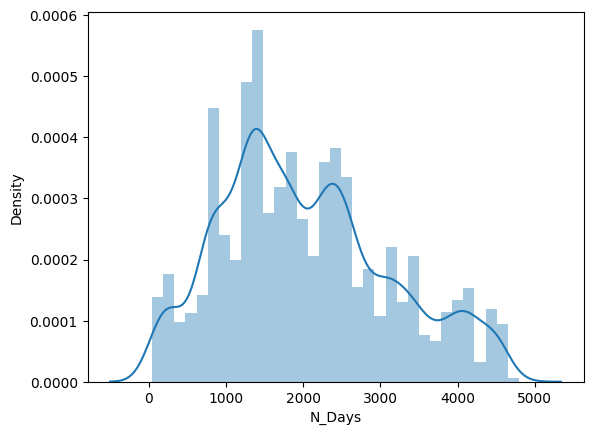

In [ ]:
sns.distplot(train['N_Days'])

### (3) Age

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

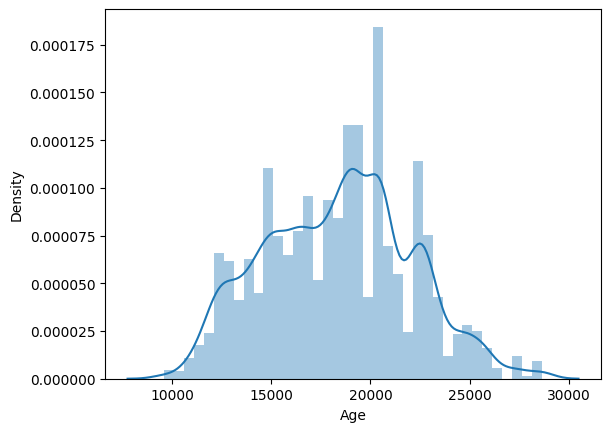

In [ ]:
sns.distplot(train['Age'])

## 3. float
- Bilirubin
- Cholesterol
- Albumin
- Copper
- Alk_Phos
- SGOT
- Tryglicerides
- Platelets
- Prothrombin
- Stage

### (1) Bilirubin

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\3513246275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Bilirubin'])


<AxesSubplot:xlabel='Bilirubin', ylabel='Density'>

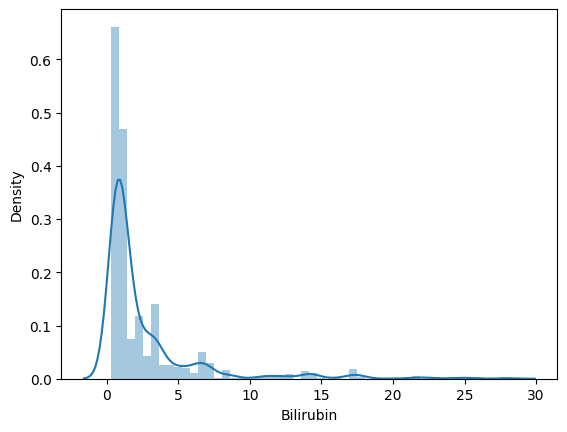

In [ ]:
sns.distplot(train['Bilirubin'])

### (2) Cholesterol

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\814006353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Cholesterol'])


<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

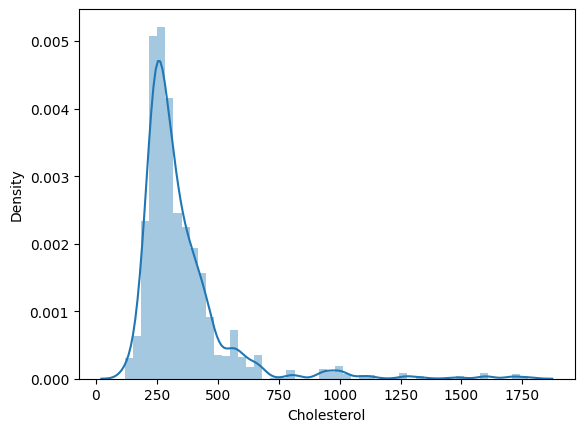

In [ ]:
sns.distplot(train['Cholesterol'])

### (3) Albumin

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\3057031082.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Albumin'])


<AxesSubplot:xlabel='Albumin', ylabel='Density'>

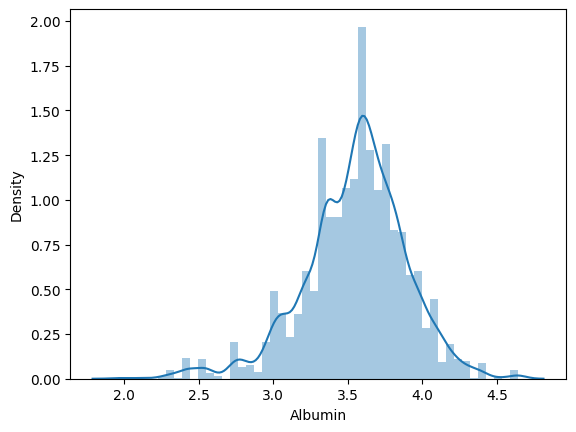

In [ ]:
sns.distplot(train['Albumin'])

### (4) Copper

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\3631095552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Copper'])


<AxesSubplot:xlabel='Copper', ylabel='Density'>

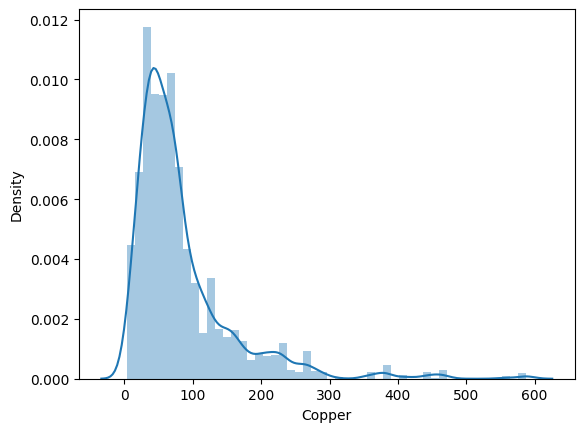

In [ ]:
sns.distplot(train['Copper'])

### (5) Alk_Phos

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\5312427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Alk_Phos'])


<AxesSubplot:xlabel='Alk_Phos', ylabel='Density'>

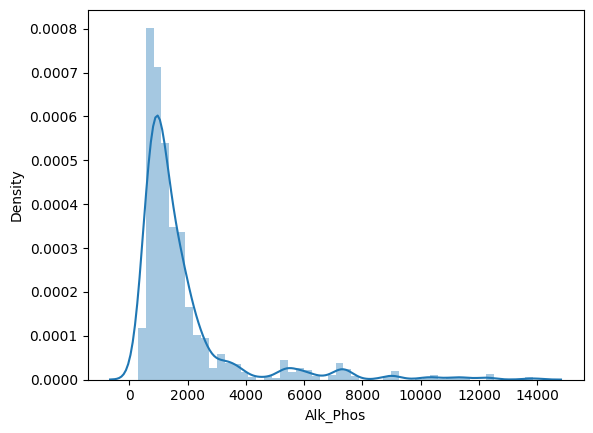

In [ ]:
sns.distplot(train['Alk_Phos'])

### (6) SGOT

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\1794868114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SGOT'])


<AxesSubplot:xlabel='SGOT', ylabel='Density'>

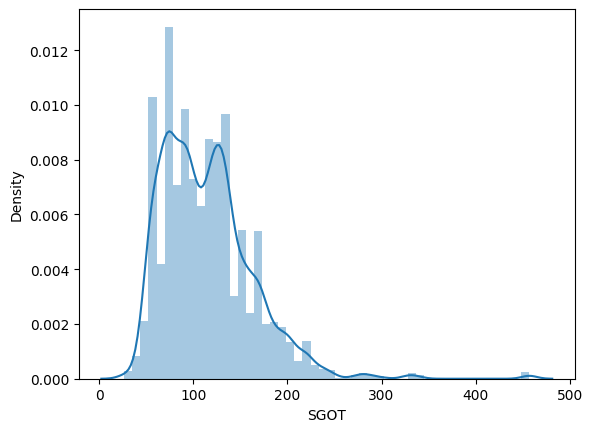

In [ ]:
sns.distplot(train['SGOT'])

### (7) Tryglicerides

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\844540977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Tryglicerides'])


<AxesSubplot:xlabel='Tryglicerides', ylabel='Density'>

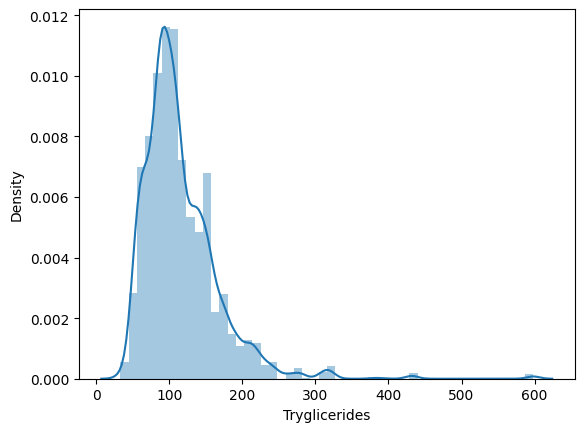

In [ ]:
sns.distplot(train['Tryglicerides'])

### (8) Platelets

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\342610504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Platelets'])


<AxesSubplot:xlabel='Platelets', ylabel='Density'>

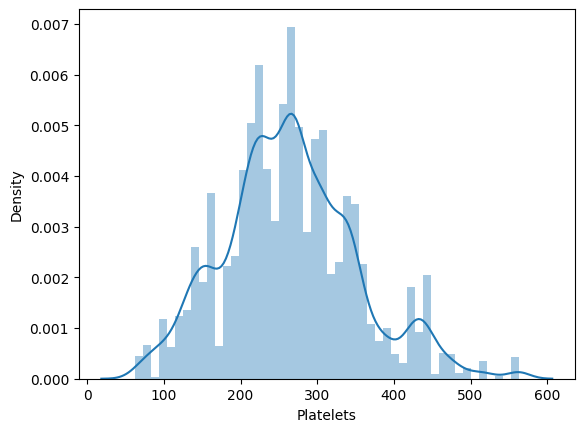

In [ ]:
sns.distplot(train['Platelets'])

### (9) Prothrombin

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27656\4293026118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Prothrombin'])


<AxesSubplot:xlabel='Prothrombin', ylabel='Density'>

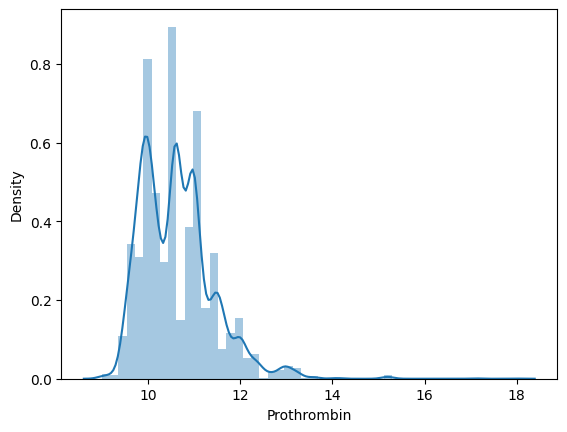

In [ ]:
sns.distplot(train['Prothrombin'])

### (10) Stage

In [ ]:
train['Stage'].value_counts()

3.0    3153
4.0    2703
2.0    1652
1.0     397
Name: Stage, dtype: int64

In [ ]:
train['Stage'].astype('int')
test['Stage'].astype('int')

0       2
1       2
2       4
3       2
4       1
       ..
5266    3
5267    3
5268    3
5269    1
5270    2
Name: Stage, Length: 5271, dtype: int32

<AxesSubplot:>

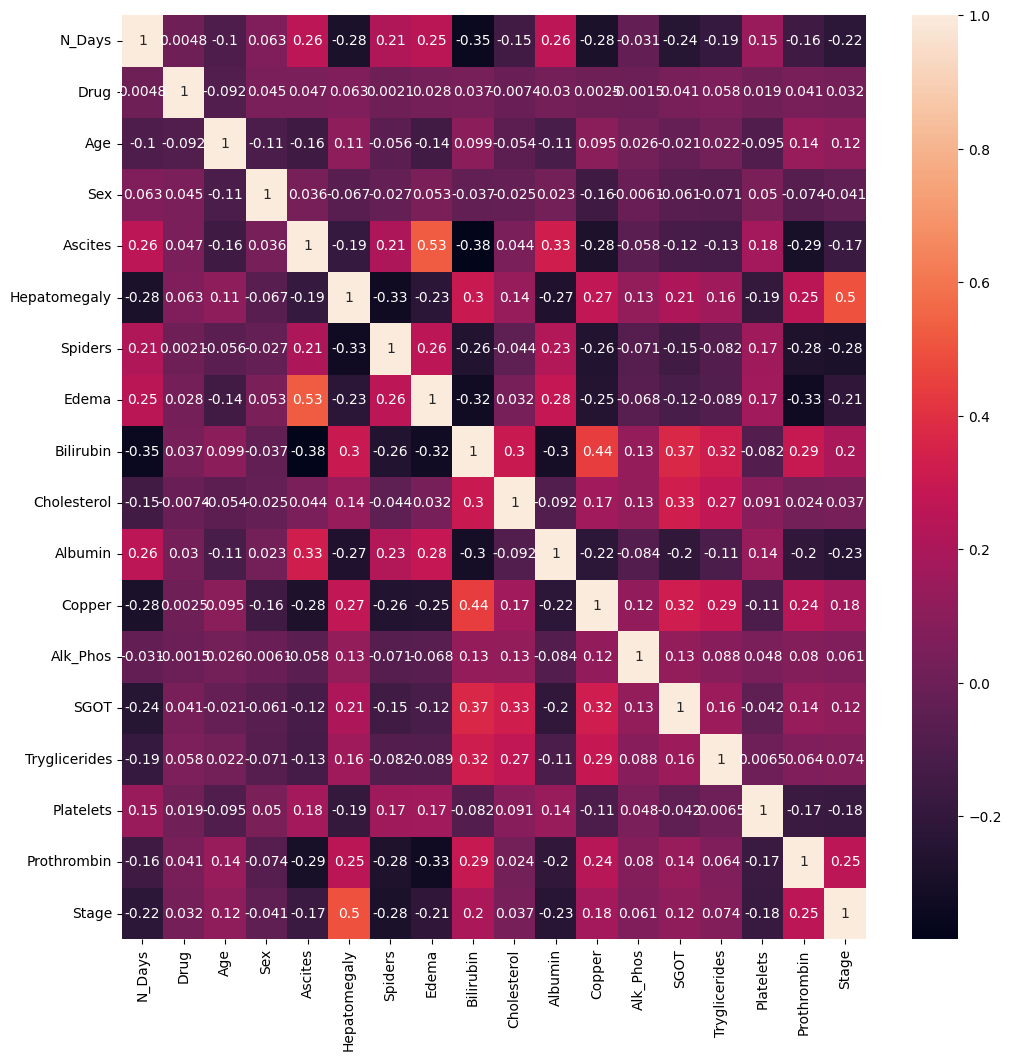

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(data = train.corr(), annot = True)

# 모델링
- LightGBM
- DecisionTree
- RandomForest
- GradientBoosting

In [ ]:
X_train = train.drop('Status', axis=1)
y_train = train['Status']

In [ ]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## 1. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(XX_train, yy_train)
pred = rf_clf.predict(XX_test)
accuracy_test = accuracy_score(yy_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy_test))

결정 트리 예측 정확도 : 0.8071


#### RandomForest 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 400, 1000],
    'max_depth':[None, 12],
    'min_samples_leaf':[1, 4, 8],
    'min_samples_split':[1, 2, 4]
    }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}
최고 평균 정확도 수치 : 0.8256


#### 최적 하이퍼 파라미터를 넣은 모델

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_leaf=1, min_samples_split=4)
rf_clf1.fit(XX_train, yy_train)
pred = rf_clf1.predict(XX_test)
accuracy_test = accuracy_score(yy_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy_test))

결정 트리 예측 정확도 : 0.8109


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_leaf=1, min_samples_split=4)
rf_clf.fit(X_train, y_train)

pred_proba = rf_clf.predict_proba(test)
pred_proba = pd.DataFrame(pred_proba, columns=['C', 'CL', 'D'])

submission = pd.read_csv('./data/sample_submission.csv')
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('./data/randomforest_2.csv', index=False)

n_estimators=400, max_depth=None, min_samples_leaf=1, min_samples_split=4

결정 트리 예측 정확도 : 0.8109

1. private : 0.46649, public : 0.46392
2. private : 0.45257, public : 0.46414

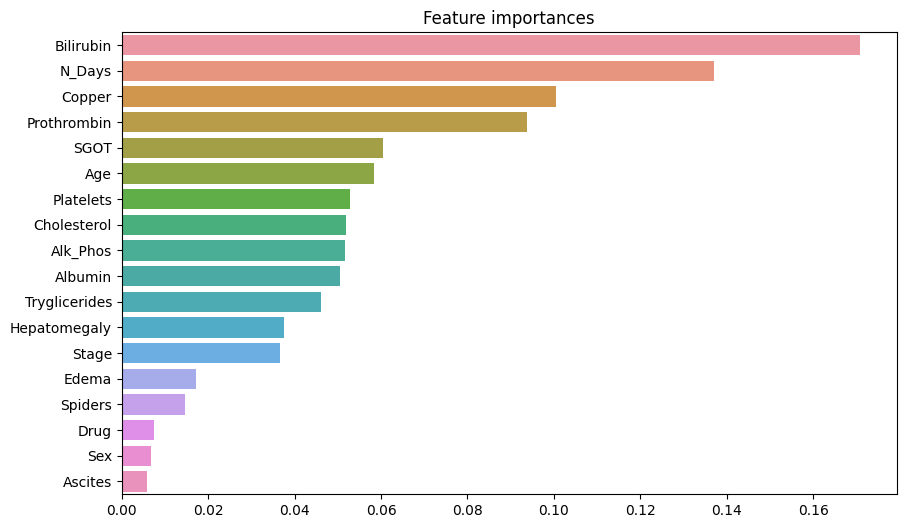

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_sorted = ftr_importances.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted, y = ftr_sorted.index)
plt.show()

## 2. GBM (Gradient Boosting Machine)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(XX_train, yy_train)
gb_pred = gb_clf.predict(XX_test)
gb_accuracy = accuracy_score(yy_test, gb_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(gb_accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', gb_clf.get_params())

결정 트리 예측 정확도 : 0.8033
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


#### GBM 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'min_samples_leaf': [2],
    'min_samples_split': [1, 2]
    }

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
최적 하이퍼 파라미터 :
 {'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최고 평균 정확도 수치 : 0.8275


In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(XX_test)
gb_accuracy = accuracy_score(yy_test, gb_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(gb_accuracy))

결정 트리 예측 정확도 : 0.8343


In [ ]:
pred_proba = grid_cv.best_estimator_.predict_proba(test)
pred_proba = pd.DataFrame(pred_proba, columns=['C', 'CL', 'D'])

submission = pd.read_csv('./data/sample_submission.csv')
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('./data/gradient_boosting_2.csv', index=False)

1. private : 0.43681, public : 0.43218
2. private : 0.43826, public : 0.43225

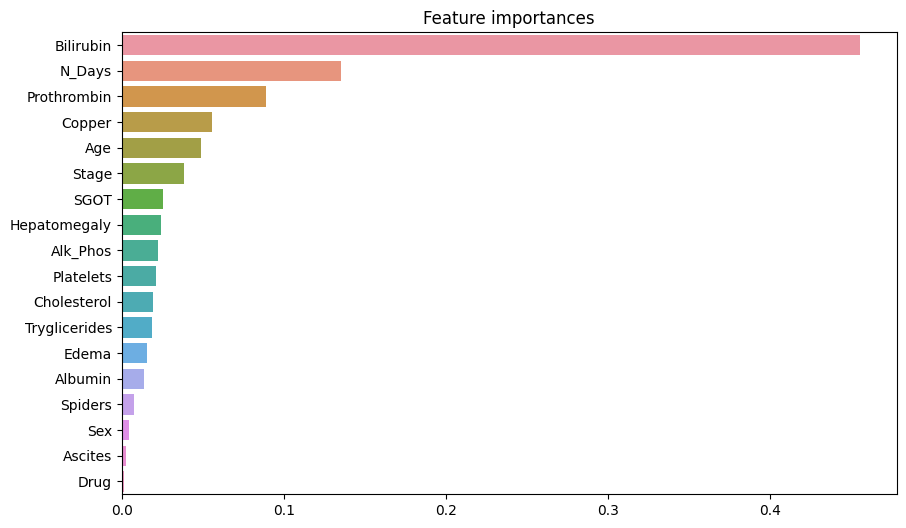

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_sorted = ftr_importances.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted, y = ftr_sorted.index)
plt.show()

## 3. XGB

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier


## 4. 앙상블

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(XX_train, yy_train)
pred = vo_clf.predict(XX_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(yy_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(XX_train, yy_train)
    pred = classifier.predict(XX_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(yy_test, pred)))


Voting 분류기 정확도 : 0.7609
LogisticRegression 정확도 : 0.7577
KNeighborsClassifier 정확도 : 0.7483


In [ ]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(XX_train, yy_train)
pred = vo_clf.predict(XX_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(yy_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [rf_clf, gb_clf]
for classifier in classifiers :
    classifier.fit(XX_train, yy_train)
    pred = classifier.predict(XX_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(yy_test, pred)))


Voting 분류기 정확도 : 0.8039
RandomForestClassifier 정확도 : 0.8121
GradientBoostingClassifier 정확도 : 0.8033
